**DELANYO NUTAKOR**

CS 251/2: Data Analysis and Visualization

Spring 2025

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/CS251/Projects/Project06')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(suppress=True, precision=5, legacy='1.25')

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Project 6 | Supervised Learning

## Task 1: K Nearest Neighbors (KNN) Classifier

To start off the project, you will implement the **KNN classifier**, a bedrock, highly-versatile, nonparametric (i.e. *memory-based*) supervised learning algorithm. You will test out and experiment with KNN on a **multi-class spiral 2D dataset**.

### 1a. Load and visualize spiral data

1. Below, load in the spiral dataset training set (`spiral_train.csv`) and both validation sets (`spiral_val1.csv`, `spiral_val2.csv`). The training set has 3,000 samples and each validation set has 1,200 samples (*there is no test set for this development dataset*).
2. Create a 1x3 grid plot showing the training set and both validation sets side-by-side.
    - Be sure to label your subplots with informative titles (which dataset are we looking at?).
    - Color-code the points based on their class.
    - Set the figure size to make everything clearly legible (not microscopic).
3. Convert your datasets from pandas to ndarray format.
4. For this dataset, the class labels are a column in the CSV files. Before moving on, create separate arrays to store the training and validation labels. Remove the labels from your train and test dataset arrays (i.e. they should be `(N, 2)`).

#### Format of spiral data

- Column 1: x coordinate of a 2D point (on a spiral).
- Column 2: y coordinate of a 2D point (on a spiral).
- Column 3: class. Which spiral arm does the point belong to? Labels: [0, 1, 2, 3]

In [ ]:
# Load the spiral datasets
spiral_train_df = pd.read_csv('data/spiral_train.csv')
spiral_val1_df = pd.read_csv('data/spiral_val1.csv')
spiral_val2_df = pd.read_csv('data/spiral_val2.csv')

# Convert to numpy arrays
spiral_train_np = spiral_train_df.values
spiral_val1_np = spiral_val1_df.values
spiral_val2_np = spiral_val2_df.values

# Separate features and labels
spiral_train = spiral_train_np[:, :2]
spiral_train_y = spiral_train_np[:, 2].astype(int)

spiral_val1 = spiral_val1_np[:, :2]
spiral_val1_y = spiral_val1_np[:, 2].astype(int)

spiral_val2 = spiral_val2_np[:, :2]
spiral_val2_y = spiral_val2_np[:, 2].astype(int)

# Provided test code
print(f'Spiral 1 train {spiral_train.shape}, classes {spiral_train_y.shape}')
print(f'Spiral 1 validation {spiral_val1.shape}, classes {spiral_val1_y.shape}')
print(f'Spiral 2 validation {spiral_val2.shape}, classes {spiral_val2_y.shape}')
print()

print(f'Spiral 1 train data in ndarray format? {isinstance(spiral_train, np.ndarray)}')
print(f'Spiral 1 train class in ndarray format? {isinstance(spiral_train_y, np.ndarray)}')
print(f'Spiral 1 validation data in ndarray format? {isinstance(spiral_val1, np.ndarray)}')
print(f'Spiral 1 validation class in ndarray format? {isinstance(spiral_val1_y, np.ndarray)}')
print(f'Spiral 2 validation data in ndarray format? {isinstance(spiral_val2, np.ndarray)}')
print(f'Spiral 2 validation class in ndarray format? {isinstance(spiral_val2_y, np.ndarray)}')

Spiral 1 train (3000, 2), classes (3000,)
Spiral 1 validation (1200, 2), classes (1200,)
Spiral 2 validation (1200, 2), classes (1200,)

Spiral 1 train data in ndarray format? True
Spiral 1 train class in ndarray format? True
Spiral 1 validation data in ndarray format? True
Spiral 1 validation class in ndarray format? True
Spiral 2 validation data in ndarray format? True
Spiral 2 validation class in ndarray format? True


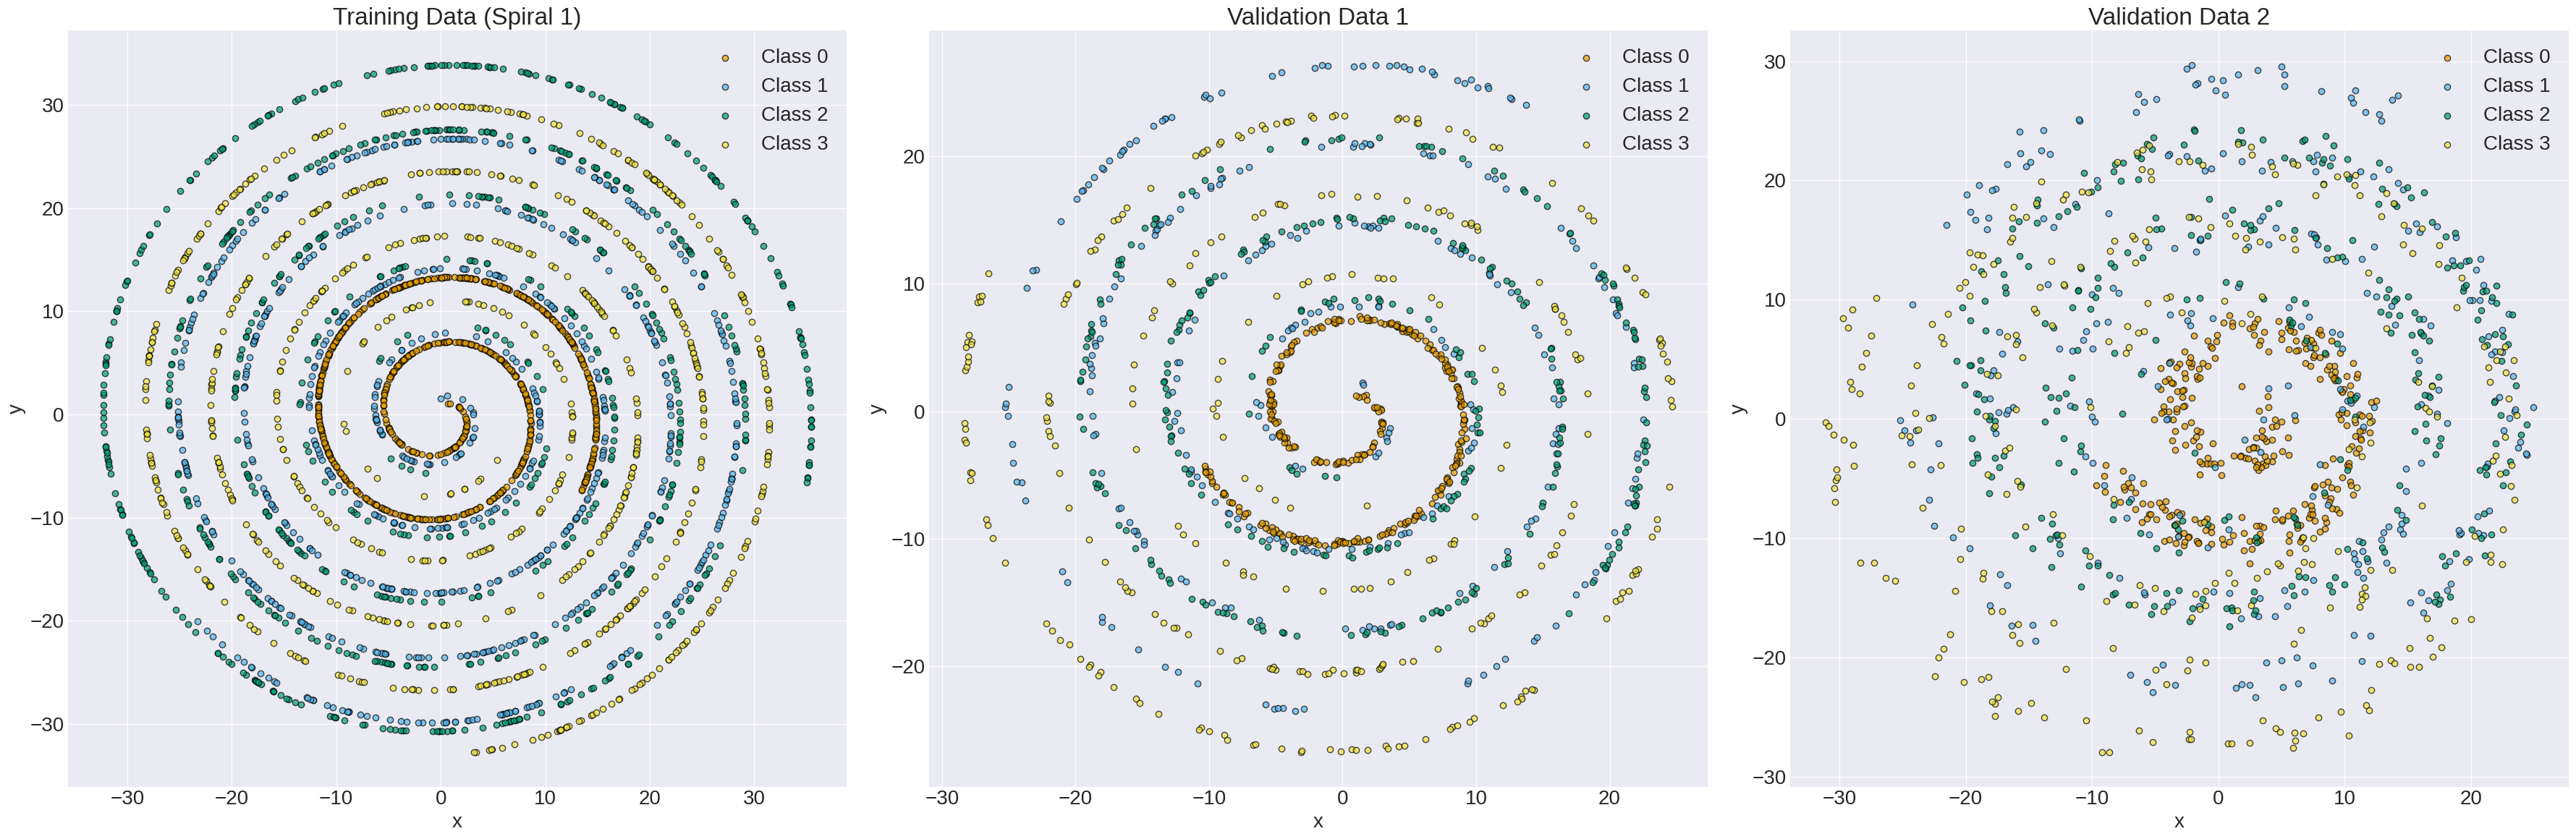

In [ ]:
plt.figure(figsize=(36, 12))

colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442']

# Plot training data
plt.subplot(1, 3, 1)
for c in range(4):
    idx = spiral_train_y == c
    plt.scatter(spiral_train[idx, 0], spiral_train[idx, 1],
                c=colors[c], edgecolor='k', alpha=0.7, label=f'Class {c}')
plt.title('Training Data (Spiral 1)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Plot validation set 1
plt.subplot(1, 3, 2)
for c in range(4):
    idx = spiral_val1_y == c
    plt.scatter(spiral_val1[idx, 0], spiral_val1[idx, 1],
                c=colors[c], edgecolor='k', alpha=0.7, label=f'Class {c}')
plt.title('Validation Data 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Plot validation set 2
plt.subplot(1, 3, 3)
for c in range(4):
    idx = spiral_val2_y == c
    plt.scatter(spiral_val2[idx, 0], spiral_val2[idx, 1],
                c=colors[c], edgecolor='k', alpha=0.7, label=f'Class {c}')
plt.title('Validation Data 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 1b. Implement KNN


Implement the following methods of `Classifier` in `classifier.py`, which will be the parent class to the `KNN` classifier.
- Constructor
- `accuracy(y, y_pred)`: Compute percent correct given true data class labels `y` and algorithm predicted class labels `y_pred`.

Implement the following methods of `KNN` in `knn.py`.
- Constructor
- `train(data, y)`: Train the KNN classifier on the data `data`, where training samples have corresponding class labels in `y`.
- `predict(data, k)`: Use the trained KNN classifier to predict the class label of each test sample in `data`. Determine class by voting: find the closest `k` training exemplars (training samples) and the class is the majority vote of the classes of these training exemplars.

Test relevant methods using the test code below.

In [ ]:
from knn import KNN

#### Test: Accuracy

In [ ]:
np.random.seed(0)
test_y = np.random.randint(low=0, high=11, size=(50,))
test_y_pred = np.random.randint(low=0, high=11, size=(50,))

classifier = KNN(num_classes=0)
acc = classifier.accuracy(test_y, test_y_pred)
print(f'Test accuracy is {acc} and should be 0.06.')

Test accuracy is 0.06 and should be 0.06.


#### Test: 1-NN

In [ ]:
n_classes = 4
classifier = KNN(num_classes=n_classes)
classifier.train(spiral_train, spiral_train_y)

k = 1
spiral_1_y_pred = classifier.predict(spiral_train, k)
acc = classifier.accuracy(y=spiral_train_y, y_pred=spiral_1_y_pred)
print(f'Your accuracy with K=1 is {acc} and should be 1.0')

Your accuracy with K=1 is 1.0 and should be 1.0


#### Test 2-NN

*Note: The below test code assumes that you resolve voting ties with the class that has a lower index. There is a numpy function that you may feel inclined to use (or not!) that handles this automatically.*

In [ ]:
n_classes = 4
classifier = KNN(num_classes=n_classes)
classifier.train(spiral_train, spiral_train_y)

k = 2
spiral_1_y_pred = classifier.predict(spiral_val1, k)
acc = classifier.accuracy(y=spiral_val1_y, y_pred=spiral_1_y_pred)
print(f'Your accuracy with K=2 is {acc:.2f} and should be 0.82')

true_test_y = np.array([1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 0., 2., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.])

print(f'The mismatches between your predicted class of validation samples with indices 400-450 and the expected values \
      are\n{np.where(true_test_y != spiral_1_y_pred[400:450], 1, 0)}')
print('Seeing all 0s means everything seems to be working great!')

Your accuracy with K=2 is 0.82 and should be 0.82
The mismatches between your predicted class of validation samples with indices 400-450 and the expected values       are
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Seeing all 0s means everything seems to be working great!


### 1c. Questions

**Question 1:** Why in the above 1-NN test, the accuracy must be 100%.

**Answer 1:**  

In the 1-NN test, we're predicting the class labels for the same data points that were used for training. With k=1, the nearest neighbor for each training point is itself (with a distance of 0). Therefore, the predicted class for each point will always be its own class, resulting in 100% accuracy. This is an example of the KNN classifier memorizing the training data perfectly when k=1, but it doesn't necessarily indicate good generalization performance.

### 1d. Find the best `k`

- Below, "script" your `predict` method on spiral validation sets 1 and 2. Compute the accuracy on the respective validation sets with many different values of `k`.
- Create two well-labeled plots, one for each spiral dataset, showing the accuracy for many different `k` values.

In [ ]:
n_classes = 4
classifier = KNN(num_classes=n_classes)
classifier.train(spiral_train, spiral_train_y)

k_values = range(1, 21)

val1_accuracies = np.zeros(len(k_values))
val2_accuracies = np.zeros(len(k_values))

for i, k in enumerate(k_values):
    val1_y_pred = classifier.predict(spiral_val1, k)
    val1_accuracies[i] = classifier.accuracy(spiral_val1_y, val1_y_pred)

    val2_y_pred = classifier.predict(spiral_val2, k)
    val2_accuracies[i] = classifier.accuracy(spiral_val2_y, val2_y_pred)

best_k_val1 = k_values[np.argmax(val1_accuracies)]
best_k_val2 = k_values[np.argmax(val2_accuracies)]

print(f"Validation Set 1: Best k = {best_k_val1} with accuracy = {np.max(val1_accuracies):.4f}")
print(f"Validation Set 2: Best k = {best_k_val2} with accuracy = {np.max(val2_accuracies):.4f}")

Validation Set 1: Best k = 1 with accuracy = 0.8500
Validation Set 2: Best k = 11 with accuracy = 0.4492


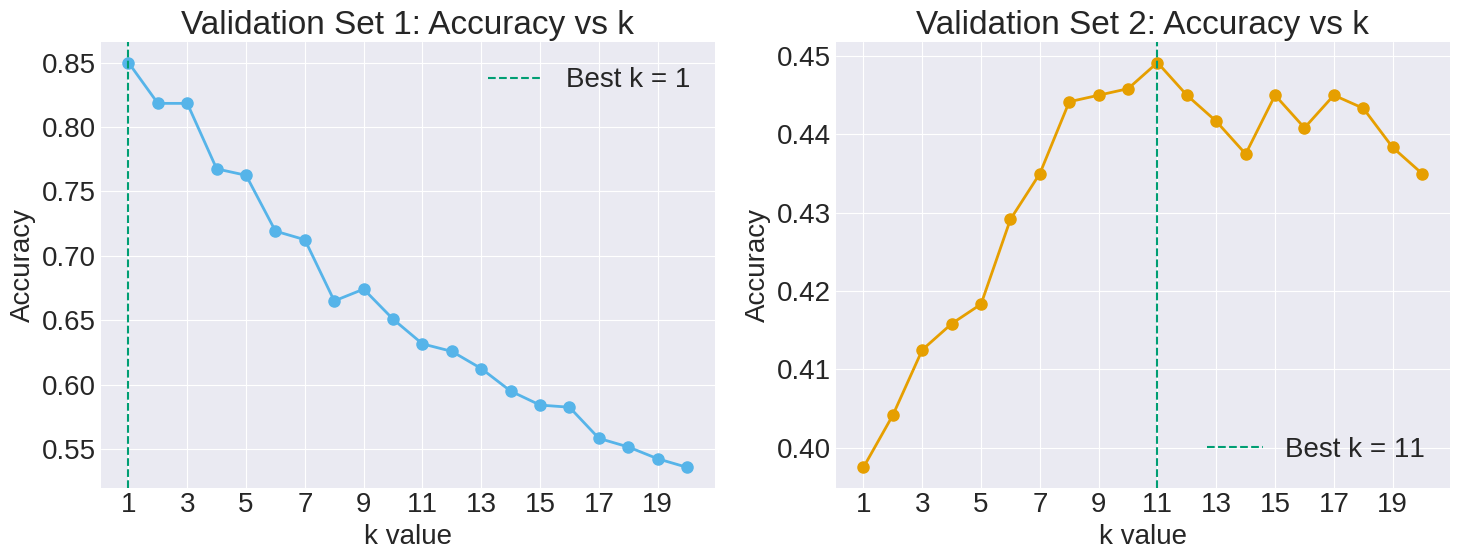

In [ ]:
-..

### 1e. Questions

**Question 2:** What is the `k` that results in the highest accuracy on each spiral dataset?

**Answer 2:**

The best k value for Validation Set 1 is 1, and the best k value for Validation Set 2 is 11.

**Question 3:** Why are is peak accuracy similar or different across the two validation sets?

**Answer 3:**

The peak accuracies differ dramatically between the validation sets because they represent fundamentally different data challenges. Validation Set 1 is relatively easy to classify (85% accuracy) and works best with k=1, suggesting clean data with well-defined class boundaries. In contrast, Validation Set 2 is much harder (only 45% accuracy) and needs k=11 for best results, indicating noisier data where averaging over more neighbors helps.

The differing trends are telling too - Set 1's accuracy steadily drops as k increases, while Set 2 improves until k=11 before fluctuating. This suggests Set 1 has precise boundaries that get blurred with higher k values, while Set 2 benefits from the "averaging effect" of considering more neighbors to overcome noise.

**Question 4:** Why are is the best `k` value similar or different across the two validation sets?

**Answer 4:**

Validation Set 1 works best with k=1 because it has clean, well-defined boundaries between classes. Just one neighbor gives enough information, and more neighbors actually hurt accuracy by blurring these clean lines.

Validation Set 2 needs k=11 because it's messier, with more overlap or noise between classes. One neighbor isn't reliable enough - you need to take a vote from several neighbors to see the true pattern through the noise.

It's like the difference between reading clear handwriting (one example is enough) versus messy handwriting (you need several examples to be sure what the letter is).

### 1f. Visualize class boundaries

1. Implement `plot_predictions` in `knn.py` to visualize how different regions of the (2D) dataspace would be classified. In this visualization, use four discrete colors to represent each of the classes. For example, if KNN would classify (x, y) = (10, 10) to spiral 2, you would color that region blue (for example). You will repeat this for lots of different regularly spaced x,y points to get a better picture of the regions that would be predicted to belong to different classes.
2. Run the following code to generate the KNN class boundaries for `k=1` and `k=15`.

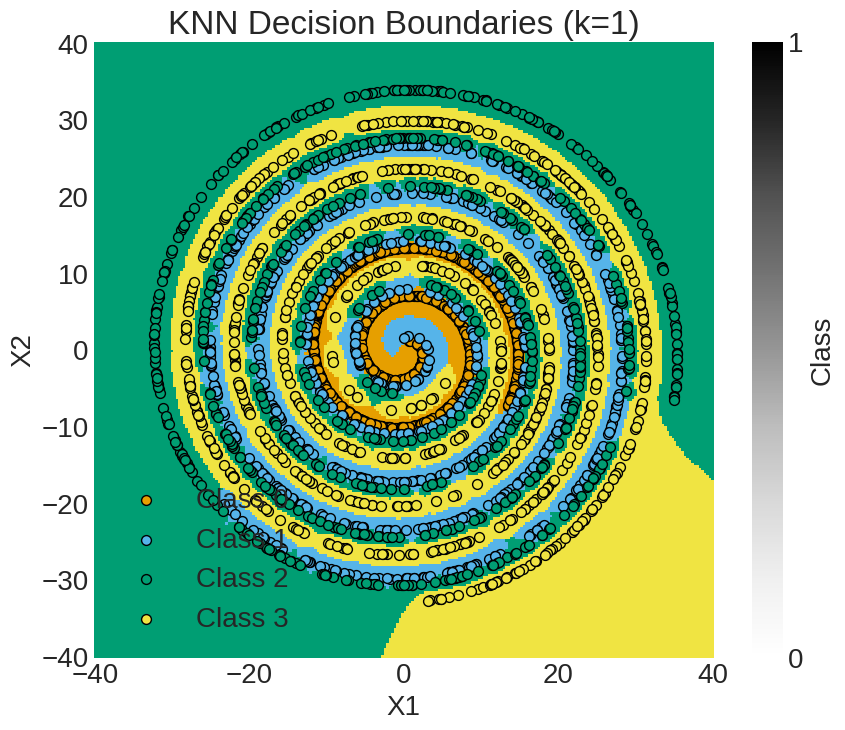

In [ ]:
# Visualize KNN boundary 1
n_classes = 4
k = 1
n_sample_pts = 250

classifier = KNN(num_classes=n_classes)
classifier.train(spiral_train, spiral_train_y)
classifier.plot_predictions(k=k, n_sample_pts=n_sample_pts)

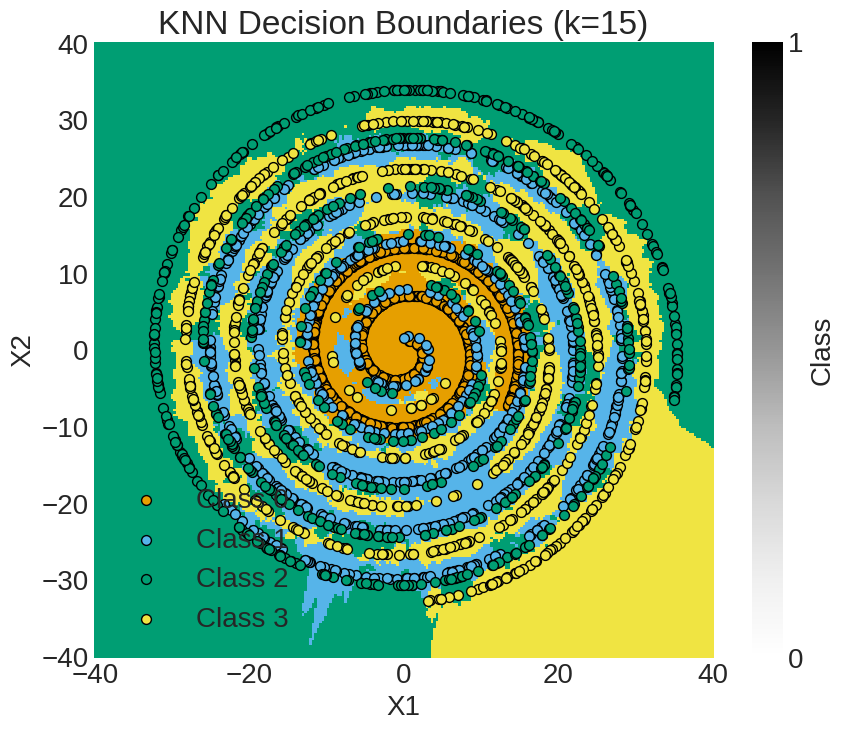

In [ ]:
# Visualize KNN boundary 2
n_classes = 4
k = 15
n_sample_pts = 250

classifier = KNN(num_classes=n_classes)
classifier.train(spiral_train, spiral_train_y)
classifier.plot_predictions(k=k, n_sample_pts=n_sample_pts)

### 1g. Questions

**Question 5:** Why do the two plots look so different?

**Answer 5:**

The k=1 plot actually has smoother boundaries between spiral arms, while the k=15 plot shows more jagged, fragmented regions with those small "fingers" extending outward. With k=1, classifications follow the natural spiral flow, while k=15 creates those strange artifacts because it's considering too many neighbors from different spirals at once, causing interference patterns in the boundaries.


**Question 6:** Why is the bottom-right region a different color than the other regions on the outer perimeter?

**Answer 6:**

The bottom-right yellow region still stands out because that's where the yellow spiral arm's influence dominates, but in the k=15 case, you can see more fragmentation and intrusion patterns along that border compared to the cleaner k=1 boundary.